In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np
import datetime
from cryptocmd import CmcScraper


import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from scipy import stats
from matplotlib import pyplot
from pmdarima import auto_arima
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import prophet

%matplotlib inline
sns.set()

In [2]:
# Descarga de datos
# ==============================================================================

# Se inicializa el Scraper, se incluye simbolo, inicio y fin de la descarga
scraper = CmcScraper('BTC', '28-04-2013', '31-12-2022')

# Transformar datos recogidos en un dataframe
data = scraper.get_dataframe()
data.sort_values(by='Date', ascending=True, inplace=True)

pd.set_option('display.max_columns', None)
display(data)
pd.reset_option('display.max_columns')

,Date,Open,High,Low,Close,Volume,Market Cap
3534,2013-04-28,135.300003,135.979996,132.100006,134.210007,0.000000e+00,1.488567e+09
3533,2013-04-29,134.444000,147.488007,134.000000,144.539993,0.000000e+00,1.603769e+09
3532,2013-04-30,144.000000,146.929993,134.050003,139.000000,0.000000e+00,1.542813e+09
3531,2013-05-01,139.000000,139.889999,107.720001,116.989998,0.000000e+00,1.298955e+09
3530,2013-05-02,116.379997,125.599998,92.281898,105.209999,0.000000e+00,1.168517e+09
...,...,...,...,...,...,...,...
4,2022-12-27,16919.291650,16959.846476,16642.073182,16717.173980,1.574858e+10,3.217172e+11
3,2022-12-28,16716.400221,16768.170356,16497.557039,16552.571737,1.700571e+10,3.185671e+11
2,2022-12-29,16552.322491,16651.756664,16508.683153,16642.342672,1.447224e+10,3.203093e+11
1,2022-12-30,16641.329824,16643.427410,16408.475177,16602.585156,1.592916e+10,3.195595e+11


In [3]:
# Preparación del datos
# ==============================================================================
data['date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d %H:%M:%S')
data = data.loc[:, ['date', 'Open', 'Close', 'High', 'Low']]
data_ETH = data.rename({'Open': 'open', 'Close': 'close', 'High': 'high', 'Low': 'low'}, 
                    axis=1)
#data = data.set_index('date')
#data = data.asfreq('D')
data_ETH = data.sort_index()

In [4]:
data_ETH.tail()

,date,Open,Close,High,Low
3530,2013-05-02,116.379997,105.209999,125.599998,92.281898
3531,2013-05-01,139.000000,116.989998,139.889999,107.720001
3532,2013-04-30,144.000000,139.000000,146.929993,134.050003
3533,2013-04-29,134.444000,144.539993,147.488007,134.000000
3534,2013-04-28,135.300003,134.210007,135.979996,132.100006


In [5]:
y_2022 = data_ETH.loc[(data_ETH['date'] >= '2014-01-01')
                     & (data_ETH['date'] < '2022-12-31')]

In [6]:
y_2022.head()

,date,Open,Close,High,Low
1,2022-12-30,16641.329824,16602.585156,16643.427410,16408.475177
2,2022-12-29,16552.322491,16642.342672,16651.756664,16508.683153
3,2022-12-28,16716.400221,16552.571737,16768.170356,16497.557039
4,2022-12-27,16919.291650,16717.173980,16959.846476,16642.073182
5,2022-12-26,16842.249311,16919.805175,16920.123640,16812.370076


In [7]:
y_2022.date = pd.to_datetime(y_2022.date)
y_2022.set_index('date', inplace=True)
y_2022.head()

C:\Users\Angel\AppData\Local\Temp\ipykernel_12848\522649752.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_2022.date = pd.to_datetime(y_2022.date)


,Open,Close,High,Low
date,,,,
2022-12-30,16641.329824,16602.585156,16643.427410,16408.475177
2022-12-29,16552.322491,16642.342672,16651.756664,16508.683153
2022-12-28,16716.400221,16552.571737,16768.170356,16497.557039
2022-12-27,16919.291650,16717.173980,16959.846476,16642.073182
2022-12-26,16842.249311,16919.805175,16920.123640,16812.370076


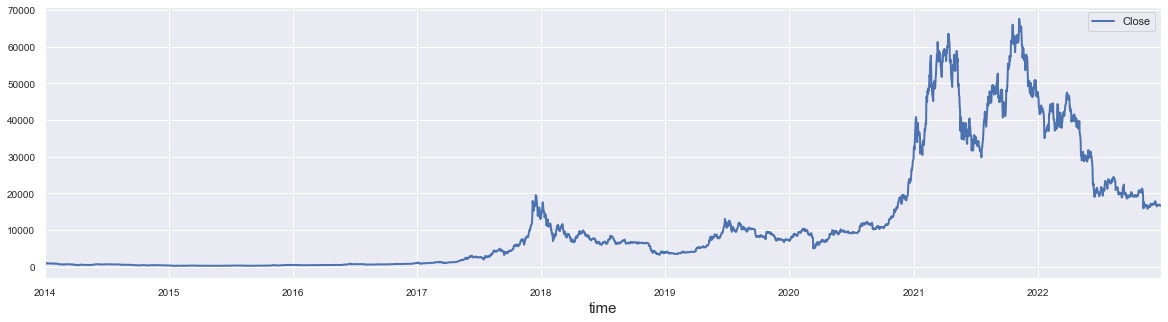

In [8]:
#Evolución 
y_2022[['Close']].plot(figsize=(20,5), linewidth=2, fontsize=10)
plt.xlabel('time', fontsize=15);

In [9]:
## analisis de estacionalidad

In [10]:
beer=y_2022['Close']

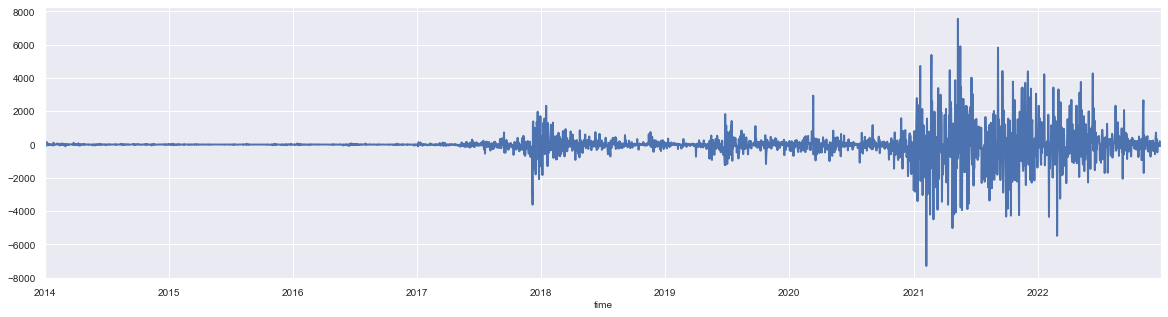

In [11]:
#Primera diferencia de la serie (niveles)
beer.diff().plot(figsize=(20,5), linewidth=2, fontsize=10)
plt.xlabel('time', fontsize=10);

### No obstante, a continuación, se procede a realizar la prueba de Dickey- Fuller para realizar una verificación formal de la estacionariedad de la serie.

In [12]:
#Prueba Dickey- Fuller
result = adfuller(y_2022['Close'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.514341
p-value: 0.526406
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


### no se puede rechazar la hipótesis nula de no estacionariedad y no se puede concluir que la serie temporal sea estacionaria.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

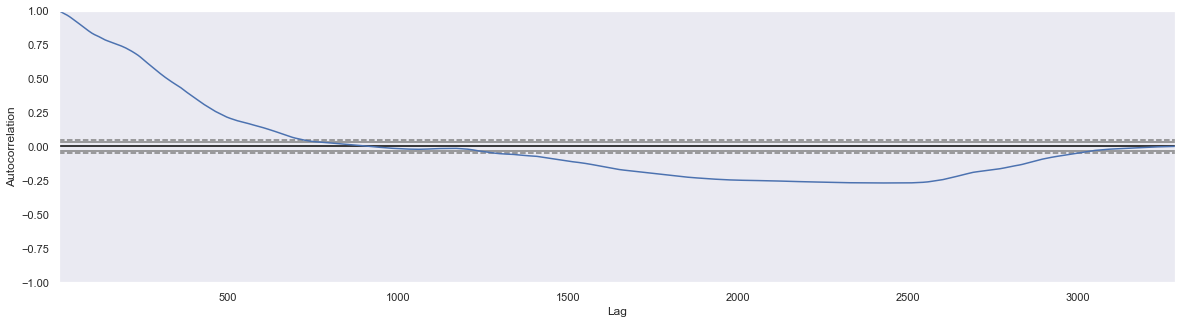

In [13]:
#Autocorrelación de la serie en análisis
plt.figure(figsize=(20,5))
pd.plotting.autocorrelation_plot(y_2022['Close'])

### Como se comprobó en el test de raíz unitaria, esta caída lenta en la función de autocorrelación simple, da indicios que la serie es no estacionaria.

# APLICACION DE LOS MODELOS !! 

#### Modelo ARIMA

In [14]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

X = y_2022['Close'].values
size = int(len(X) * 0.85)
train, test = X[0:size], X[size:len(X)]

def ARIMA_FUNCTION(p, q):
    predictions = []
    history = [x for x in train]
    for t in range(len(test)):
        model = ARIMA(history, order=(p, 1, q))
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
    return mean_squared_error(test, predictions) ** 0.5

results = []
for i in range(3):
    for j in range(4):
        if (i > j or i == 0) and (i - j < 3):
            mse = ARIMA_FUNCTION(i, j)
            results.append([i, j, mse])
            print((i, j))


(0, 0)
(0, 1)
(0, 2)
(0, 3)
(1, 0)
(2, 0)


C:\Users\Angel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Angel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(2, 1)


In [15]:
results

[[0, 0, 20.113551001381126],
 [0, 1, 20.097384837099696],
 [0, 2, 20.114645935750907],
 [0, 3, 20.099530553652386],
 [1, 0, 20.099504158669927],
 [2, 0, 20.112497824712946],
 [2, 1, 20.113317538845173]]

#### De acuerdo a los RMSE obtenidos para cada modelo evaluado en los procesos ARIMA, el mejor modelo es el ARIMA (0,1,1) con un RMSE correspondiente a 23.501.

#### 4.1.2 Estimación modelo

In [16]:
model = ARIMA(train, order=(0,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2793
Model:                 ARIMA(0, 1, 1)   Log Likelihood              -22719.576
Date:                Wed, 28 Jun 2023   AIC                          45443.153
Time:                        17:23:26   BIC                          45455.022
Sample:                             0   HQIC                         45447.437
                               - 2793                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0249      0.010     -2.418      0.016      -0.045      -0.005
sigma2      6.857e+05   6254.158    109.646      0.000    6.73e+05    6.98e+05
Ljung-Box (L1) (Q):                   0.00   Jarque-

<function matplotlib.pyplot.show(close=None, block=None)>

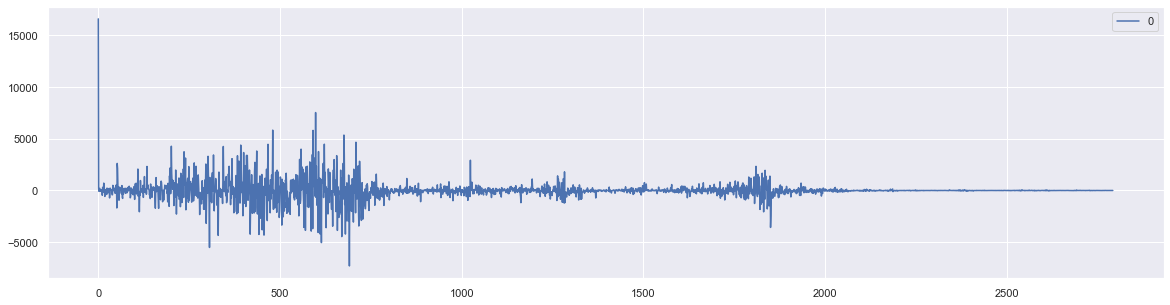

In [17]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(figsize=(20,5))
plt.show

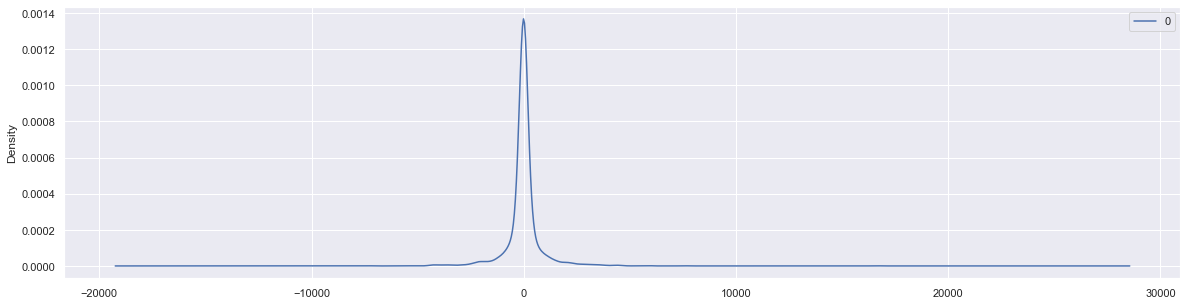

                  0
count   2793.000000
mean      -0.001164
std      885.173669
min    -7299.179990
25%     -116.631142
50%       -1.985447
75%       88.774731
max    16602.585156


In [18]:
residuals.plot(kind='kde', figsize=(20,5))
plt.show()
print(residuals.describe())

#### De acuerdo a los gráficos de los residuales podemos observar que el proceso tiene media constante, centrada alrededor de cero y varianza constante. Tambien, graficamente parece ajustarse a una distribución Normal, sin embargo validamos esto con una prueba de normalidad

In [19]:
print("KS P-value = "+str(round(stats.kstest(residuals, 'norm')[1], 10)))

KS P-value = 0.0


###### Según los resultados del test de Kolmogorov Smirnoff con un nivel de significancia del 5% no podemos concluir que los residuales se ajustan a una distribución normal.

### 4.1.4. Rolling Forecast

In [20]:
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model_1 = ARIMA(history, order=(0,1,1))
    model_fit_1 = model_1.fit()
    output = model_fit_1.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=241.794937, expected=243.863007
predicted=243.811577, expected=237.334000
predicted=237.495088, expected=229.781998
predicted=229.973813, expected=236.121002
predicted=235.968127, expected=239.018005
predicted=238.942157, expected=240.358002
predicted=240.322790, expected=234.929993
predicted=235.064111, expected=232.078995
predicted=232.153235, expected=236.145004
predicted=236.045727, expected=225.807999
predicted=226.062618, expected=225.854996
predicted=225.860160, expected=229.285995
predicted=229.200791, expected=219.429993
predicted=219.673008, expected=226.389999
predicted=226.222935, expected=231.268005
predicted=231.142524, expected=236.462006
predicted=236.329698, expected=234.175995
predicted=234.229563, expected=235.268997
predicted=235.243143, expected=224.626007
predicted=224.890089, expected=222.600006
predicted=222.656968, expected=223.356003
predicted=223.338615, expected=222.882004
predicted=222.893362, expected=228.572998
predicted=228.431721, expected=223

predicted=382.541276, expected=386.475006
predicted=386.376984, expected=382.845001
predicted=382.933013, expected=389.545990
predicted=389.381202, expected=391.441986
predicted=391.390633, expected=383.757996
predicted=383.948196, expected=382.556000
predicted=382.590693, expected=394.773010
predicted=394.469429, expected=400.869995
predicted=400.710493, expected=390.414001
predicted=390.670593, expected=378.549011
predicted=378.851087, expected=362.299011
predicted=362.711499, expected=361.562012
predicted=361.590658, expected=365.026001
predicted=364.940389, expected=352.940002
predicted=353.239068, expected=336.187012
predicted=336.611974, expected=330.079010
predicted=330.241822, expected=320.510010
predicted=320.752545, expected=328.865997
predicted=328.663793, expected=359.511993
predicted=358.743187, expected=375.071991
predicted=374.665041, expected=383.614990
predicted=383.391936, expected=386.944000
predicted=386.855473, expected=375.467010
predicted=375.750844, expected=377

predicted=460.224612, expected=461.907013
predicted=461.865017, expected=447.526001
predicted=447.883929, expected=444.717987
predicted=444.797015, expected=437.140015
predicted=437.331150, expected=478.375000
predicted=477.350439, expected=457.001007
predicted=457.508994, expected=460.273010
predicted=460.204011, expected=491.171997
predicted=490.398923, expected=495.665985
predicted=495.534499, expected=471.239014
predicted=471.845528, expected=580.827026
predicted=578.106238, expected=583.916992
predicted=583.771924, expected=583.411987
predicted=583.420973, expected=561.271973
predicted=561.824943, expected=565.039978
predicted=564.959711, expected=571.489990
predicted=571.326953, expected=588.770020
predicted=588.334526, expected=609.888000
predicted=609.349884, expected=614.831970
predicted=614.695100, expected=622.372986
predicted=622.181293, expected=631.109985
predicted=630.887062, expected=636.119995
predicted=635.989343, expected=628.799988
predicted=628.979488, expected=638

In [21]:
error_ARIMA = mean_squared_error(test, predictions)**0.5
print('Test RMSE: %.3f' % error_ARIMA)

Test RMSE: 20.097


In [22]:
# Cálculo del RMSE para el modelo ARIMA
rmse_arima = mean_squared_error(test, predictions) ** 0.5

# Cálculo del MAE para el modelo ARIMA
mae_arima = mean_absolute_error(test, predictions)

# Cálculo del R² para el modelo ARIMA
r2_arima = r2_score(test, predictions)

# Imprimir los resultados
print("Resultados para el modelo ARIMA:")
print("RMSE: ", rmse_arima)
print("MAE: ", mae_arima)
print("R²: ", r2_arima)

Resultados para el modelo ARIMA:
RMSE:  20.097384837099696
MAE:  11.999097398394962
R²:  0.9872214420848597


### Después de ejecutar el procedimiento de Rolling Forecast con el test el RMSE obtenido es de 23.501 con el ARIMA(0,1,1).

In [23]:
RollBack = pd.DataFrame({'TEST': test, 'ARIMA': predictions})
RollBack.head()

,TEST,ARIMA
0,243.863007,241.794937
1,237.334000,243.811577
2,229.781998,237.495088
3,236.121002,229.973813
4,239.018005,235.968127


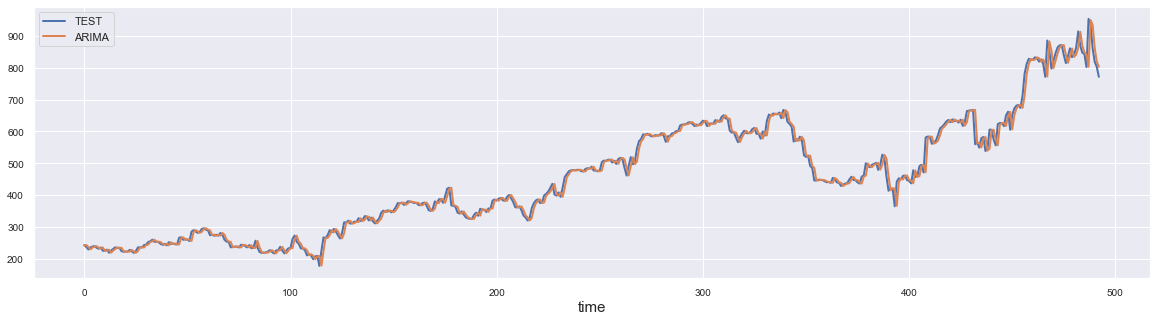

In [24]:
RollBack.plot(figsize=(20,5), linewidth=2, fontsize=10)
plt.xlabel('time', fontsize=15);

### 4.2. Modelo SARIMA

### Según el análisis de la serie existe un fuerte componente estacional en la variable Close , como se observó anteriormente, no está siendo capturado por el proceso ARIMA seleccionado. Por consiguiente, se procede a estimar un modelo SARIMA, que es un modelo ARIMA que incluye el componente estacional de las series.

#### 4.2.1. Selección proceso SARIMA a estimar

In [30]:
stepwise_model = auto_arima(train, 
                            start_p=0,
                            start_q=0, 
                            max_p=5, 
                            max_d=2, 
                            max_q=5, 
                            start_P=1,
                            start_Q=1, 
                            max_P=2, 
                            max_D=2, 
                            max_Q=2, 
                            max_order=10,
                            m=12,
                            seasonal=True,
                            trace=True,
                            error_action='ignore',  
                            suppress_warnings=True, 
                            stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=45419.402, Time=0.84 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=45444.795, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=45436.666, Time=0.39 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=45437.897, Time=0.53 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=45442.935, Time=0.03 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=45437.433, Time=0.33 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=45436.181, Time=0.30 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=45418.058, Time=4.94 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=45425.142, Time=1.89 sec
 ARIMA(0,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=14.61 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=45417.814, Time=5.97 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=45427.768, Time=2.05 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=45419.013, Time=6.61 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=45419.052, Time=7.27 sec
 ARIMA(1,1

#### Una vez evaluadas las posibles combinaciones para el proceso SARIMA, el modelo con el mejor performance es el que tiene menor AIC, en este caso es el ARIMA(0,1,0)x(1,0,2,12) con un AIC=47914.311

#### 4.2.2. Estimación modelo

In [31]:
mod = sm.tsa.statespace.sarimax.SARIMAX(train, trend='n', order=(0,1,0), seasonal_order=(1,0,2,12))
results = mod.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                 2793
Model:             SARIMAX(0, 1, 0)x(1, 0, [1, 2], 12)   Log Likelihood              -22703.947
Date:                                 Tue, 20 Jun 2023   AIC                          45415.894
Time:                                         23:24:24   BIC                          45439.632
Sample:                                              0   HQIC                         45424.464
                                                - 2793                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.6408      0.058    -11.008      0.000      -0.755      -0.527
ma.S.L12       0.5906      0.059     10.083      0.000       0.476       0.705
ma.S.L24       0.0407      0.011      3.567      0.000       0.018       0.063
sigma2      6.844e+05   6427.716    106.472      0.000    6.72e+05    6.97e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.82   Jarque-Bera (JB):             26538.84
Prob(Q):                              0.36   Prob(JB):                         0.00
Heteroskedasticity (H):               0.01   Skew:                             0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### En general, los resultados sugieren que el modelo ARIMA ajustado puede no ser adecuado para capturar la dinámica de los datos. Sería recomendable evaluar otras alternativas de modelos o considerar la inclusión de variables adicionales para mejorar las predicciones.

### 4.2.4. Rolling Forecast

In [ ]:
X = y_2022['Close'].values
size = int(len(X) * 0.85)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = sm.tsa.statespace.sarimax.SARIMAX(history, trend='n', order=(0,1,1), seasonal_order=(1,0,2,12))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)

In [ ]:
error_SARIMA = mean_squared_error(test, predictions)**0.5
print('Test RMSE: %.3f' % error_SARIMA)

In [ ]:
# Cálculo del RMSE para el modelo SARIMA
rmse_sarima = mean_squared_error(test, predictions)**0.5

# Cálculo del MAE para el modelo SARIMA
mae_sarima = mean_absolute_error(test, predictions)

# Cálculo del R² para el modelo SARIMA
r2_sarima = r2_score(test, predictions)

print("Resultados para el modelo SARIMA:")
print("RMSE: ", rmse_sarima)
print("MAE: ", mae_sarima)
print("R²: ", r2_sarima)

In [ ]:
RollBack=pd.concat([RollBack,pd.DataFrame({'SARIMA':predictions})],axis=1)
RollBack.head()

In [ ]:
RollBack.plot(figsize=(25,12), linewidth=2, fontsize=10)
plt.xlabel('time', fontsize=15);

In [ ]:
data_LSTM = pd.DataFrame({'close': y_2022.Close})
data_LSTM.head()

In [ ]:
Y = data_LSTM
size = int(len(Y) * 0.85)

train_Y, test_Y = Y[0:size], Y[size:len(Y)]

In [ ]:
scaler = MinMaxScaler()
scaler.fit(train_Y)
scaled_train_data = scaler.transform(train_Y)
scaled_test_data = scaler.transform(test_Y)

In [ ]:
n_input = 24
n_features= 1
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=1)

In [ ]:
lstm_model = Sequential()
lstm_model.add(LSTM(200, input_shape=(n_input, n_features)))
#lstm_model.add(LSTM(units=50, return_sequences = True))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

lstm_model.summary()

In [ ]:
lstm_model.fit_generator(generator,epochs=20)

In [ ]:
losses_lstm = lstm_model.history.history['loss']
plt.figure(figsize=(20,5))
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses_lstm)),losses_lstm);

In [ ]:
lstm_predictions_scaled = list()

batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(test)):   
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)

In [ ]:
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)

In [ ]:
error_LSTM = mean_squared_error(test, lstm_predictions) ** 0.5
print('Test RMSE: %.3f' % error_LSTM)

In [ ]:
RollBack = pd.concat([RollBack,pd.DataFrame({'LSTM':np.concatenate(lstm_predictions, axis=0)})],axis=1)
RollBack.head()

In [ ]:
RollBack[['TEST', 'LSTM']].plot(figsize=(20,5), linewidth=2, fontsize=10)
plt.xlabel('time', fontsize=15);

In [ ]:
RollBack.plot(figsize=(20,5), linewidth=2, fontsize=10)
plt.xlabel('time', fontsize=15);

In [ ]:
RollBack = pd.concat([RollBack,pd.DataFrame({'Time':data.Close.index[size:]})],axis=1)
RollBack.head()

In [ ]:
RollBack.set_index('Time', inplace=True)
RollBack.head()

In [ ]:
RollBack.plot(figsize=(20,5), linewidth=2, fontsize=10)
plt.xlabel('time', fontsize=15);

In [ ]:
Error = pd.DataFrame({"Models":["ARIMA", "SARIMA", "LSTM"],
                      "RMSE " : [error_ARIMA, error_SARIMA, error_LSTM]})
Error

In [ ]:
Error = pd.DataFrame({"Modelos":["ARIMA", "SARIMA", "LSTM"],
                      "RMSE " : [error_ARIMA, error_SARIMA, error_LSTM],
                      "MAE " : [mae_arima, mae_sarima, mae_lstm],
                      "R² " : [r2_arima, r2_sarima, r2_lstm]})
Error

#### 4.3. Prophet Forecast

In [ ]:
# Modelado y Forecasting
# ==============================================================================
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import backtesting_forecaster
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error

In [ ]:
# Preparación del dato
# ==============================================================================
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d %H:%M:%S')
data = data.loc[:, ['date', 'Open', 'Close', 'High', 'Low']]
data = data.rename({'Open': 'open', 'Close': 'close', 'High': 'high', 'Low': 'low'}, 
                    axis=1)
data = data.set_index('date')
data = data.asfreq('D')
data = data.sort_index()

In [ ]:
# Selección fechas train-test
# ==============================================================================
inicio_train = '2020-01-01 00:00:00'
fin_train = '2021-06-30 23:59:59'

print(f"Serie temporal completa : {data.index.min()} --- {data.index.max()}  (n={len(data)})")
print(f"Fechas train            : {data.loc[inicio_train:fin_train].index.min()} --- {data.loc[inicio_train:fin_train].index.max()}  (n={len(data.loc[inicio_train:fin_train])})")
print(f"Fechas test             : {data.loc[fin_train:].index.min()} --- {data.loc[fin_train:].index.max()}  (n={len(data.loc[fin_train:])})")

In [ ]:
# Simulación Random Walk
# ==============================================================================
df_rw = data[['close']].copy()
df_rw['pred_close'] = df_rw['close'].shift(1)

# Error de test
# ==============================================================================
y_true = df_rw.loc[fin_train:, 'close']
y_pred = df_rw.loc[fin_train:, 'pred_close']
metrica = mean_absolute_error(y_true, y_pred)

print(f'Error de test: {metrica}')
display(df_rw.loc[fin_train:,].head(4))

In [ ]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots(figsize=(11, 4.5))
df_rw.loc[fin_train:, 'close'].plot(ax=ax, linewidth=2, label='Datos Test',
                                    c='sienna')
df_rw.loc[fin_train:, 'pred_close'].plot(ax=ax, linewidth=2, label='Pred Test',
                                    c='darkblue')
ax.set_title('Random Walk (Datos Test)')
ax.set_ylabel('Precio (USD)')
ax.legend();

In [ ]:
# DataFrame errores test modelos
# ==============================================================================
df_errores = pd.DataFrame({'modelo': 'Base - Random Walk', 'lags': 1, 
                           'error_test': metrica, 'variables_exog': False},
                          index=[0])
df_errores

### Forecaster Autorregresivo

- Para intentar modelar el precio de Bitcoin se utilia un Forecaster Autorregresivo (ForecasterAutoreg) con un regresor LightGBM, una implementación del algoritmo de Gradient Boosting desarrollada por Microsoft que suele conseguir excelentes resultados

In [ ]:
# Backtest forecasters con diferentes lags
# ==============================================================================
lags = [1, 7, 30]
metricas = []
predicciones_list = []

for lag in lags:
    
    # Crear forecaster
    forecaster = ForecasterAutoreg(
                     regressor     = LGBMRegressor(random_state=123),
                     lags          = lag,
                     transformer_y = None
                 )
    
    # Backtest test data 1 step
    metrica, predicciones = backtesting_forecaster(
                                forecaster         = forecaster,
                                y                  = data.loc[inicio_train:, 'close'],
                                initial_train_size = len(data.loc[inicio_train:fin_train, 'close']),
                                fixed_train_size   = True,
                                steps              = 1,
                                refit              = True,
                                metric             = 'mean_absolute_error',
                                verbose            = False
                            )
    
    metricas.append(metrica)
    predicciones_list.append(predicciones)

In [ ]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots(figsize=(11, 4.5))
data.loc[fin_train:, 'close'].plot(ax=ax, linewidth=2, label='Datos Test')

# Plot predicciones test para diferentes lags
for predicciones, lag in zip(predicciones_list, lags):
    predicciones = predicciones.rename(columns={'pred': f'Pred test, {lag} lags'})
    predicciones.plot(ax=ax, linewidth=2)

ax.set_title('Close Price Real vs Predicciones (Datos Test)')
ax.set_ylabel('Precio (USD)')
ax.legend();

In [ ]:
import plotly.graph_objects as go
import plotly.io as pio

# Código para generar el gráfico

fig = go.Figure()

fig.add_trace(go.Scatter(x=data[fin_train:].index, y=data['close'][fin_train:],
                         mode='lines', name='Datos Test'))

# Plot predicciones test para diferentes lags
for predicciones, lag in zip(predicciones_list, lags):
    fig.add_trace(go.Scatter(x=predicciones.index, y=predicciones['pred'],
                             mode='lines', name=f'Pred test, {lag} lags'))

fig.update_layout(title='Close Price Real vs Predicciones (Datos Test)',
                  yaxis_title='Precio (USD)')

# Renderizar y mostrar el gráfico interactivo
pio.show(fig)


In [ ]:
# DataFrame errores de test modelos
# ==============================================================================
modelo = 'LGBMRegressor'

df_errores = pd.concat([
                df_errores,
                pd.DataFrame({'modelo': modelo, 'lags': lags, 
                              'error_test': metricas, 'variables_exog': False})
                ]).reset_index(drop=True)

df_errores.sort_values(by='error_test')